# Task 3

For this task again we will use the libraries and functions used in task 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def rotate_pattern(pattern):
    rotations = [pattern]
    for _ in range(3):
        pattern = np.rot90(pattern)
        rotations.append(pattern)
    return rotations

def classify_pattern(pattern, rotations):
    for i, rot in enumerate(rotations):
        if np.array_equal(pattern, rot):
            return i * 90
    return None


Loading the data for the task 3 and checking its shape - (1000, 1089)

In [3]:
loaded = np.load('endeavour.npz')
task3 = loaded["task3"]
print(task3.shape)

(1000, 1089)


Reshape the matrix from (1000, 1089) to (1000, 33, 33) <br>
sqrt(1089) = 33

In [4]:
patterns = task3.reshape(-1, 33, 33)
print(patterns.shape)

(1000, 33, 33)


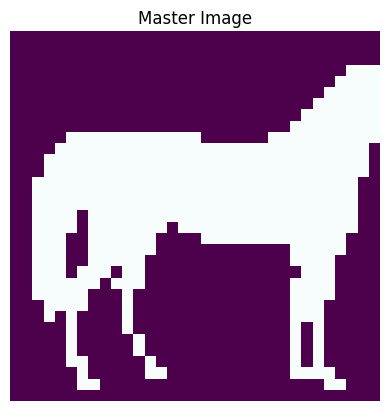

In [6]:
#Master image
master_image = patterns[0]

plt.imshow(master_image, cmap='BuPu')
plt.title("Master Image")
plt.axis('off')
plt.show()


# Plotting the whole dataset

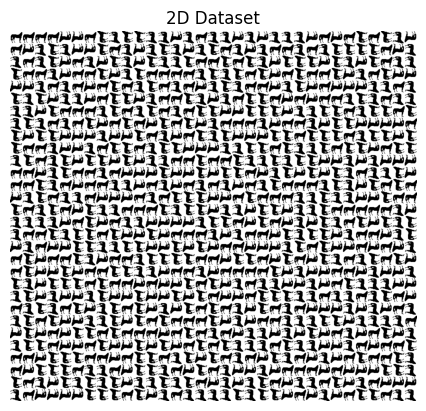

In [7]:
all_patterns = np.zeros((33 * 30, 33 * 33))

for i in range(30):
    for j in range(33):
        all_patterns[i*33:(i+1)*33, j*33:(j+1)*33] = patterns[i*33 + j]

plt.imshow(all_patterns, cmap='gray')
plt.axis('off')
plt.title('2D Dataset')
plt.show()


# Using functions from 1 and 2 task to acquire the desired result

In [8]:
# Define the function to rotate patterns
def rotate_pattern(pattern):
    rotations = [pattern]
    for _ in range(3):
        pattern = np.rot90(pattern)
        pattern = np.rot90(pattern)
        pattern = np.rot90(pattern)
        rotations.append(pattern)
    return rotations

# Classify each pattern
def classify_pattern(pattern, rotations):
    for i, rot in enumerate(rotations):
        if np.array_equal(pattern, rot):
            return i * 90
    return None

# Get the reference pattern and its rotations
master_image = patterns[0]
rotations = rotate_pattern(master_image)

# Classify all patterns in task3
orientation_counts = {0: 0, 90: 0, 180: 0, 270: 0}
classifications = []

for pattern in patterns:
    orientation = classify_pattern(pattern, rotations)
    classifications.append(orientation)
    if orientation is not None:
        orientation_counts[orientation] += 1

# Print the number of patterns in each orientation (part b)
print("Number of patterns in each orientation:")
for orientation, count in orientation_counts.items():
    print(f"{orientation} degrees: {count}")

Number of patterns in each orientation:
0 degrees: 254
90 degrees: 236
180 degrees: 250
270 degrees: 260


## Task 3.c) Demonstrating by clustering that we have correctly defined classes 

We know that in the KMeans we should use exactly 4 clusters(centroids) because in total we have exactly 4 clockwise rotations - (0°, 90°, 180° and 270°). After that we will visualize each cluster item in order to see which cluster responds to which rotation.
The disortion rate is very, very low because we dont have many different images(only rotated ones)

Clustering time: 0.09124493598937988
Distortion: 8.787435318726192e-29


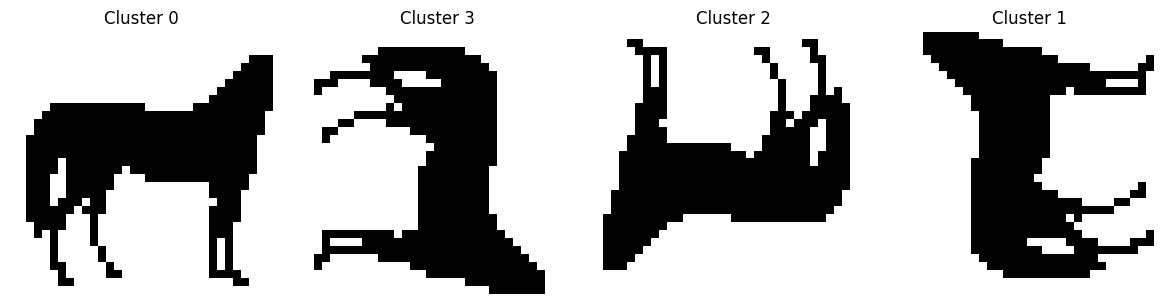

In [9]:
#KMeans clustering
from sklearn.cluster import KMeans
import time

flat_patterns = patterns.reshape(1000, -1)

# Apply KMeans clustering
start_time = time.time()
kmeans = KMeans(n_clusters=4, random_state=0).fit(flat_patterns)
end_time = time.time()

print("Clustering time:", end_time - start_time)
labels = kmeans.labels_

# Print the distortion rate
distortion_rate = kmeans.inertia_
print("Distortion:", distortion_rate / 1000)

# Sort the design matrix by cluster labels
sorted_indices = np.argsort(labels)
sorted_patterns = flat_patterns[sorted_indices]

#Visualizing the clusters to get its order
desired_order = [0, 3, 2, 1]
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for i, ax in enumerate(axes):
    cluster_pattern = flat_patterns[labels == desired_order[i]][0].reshape(33, 33)
    ax.imshow(cluster_pattern, cmap='gray')
    ax.set_title(f'Cluster {desired_order[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Sorting the images by clusters and visualizing the sorted dataset

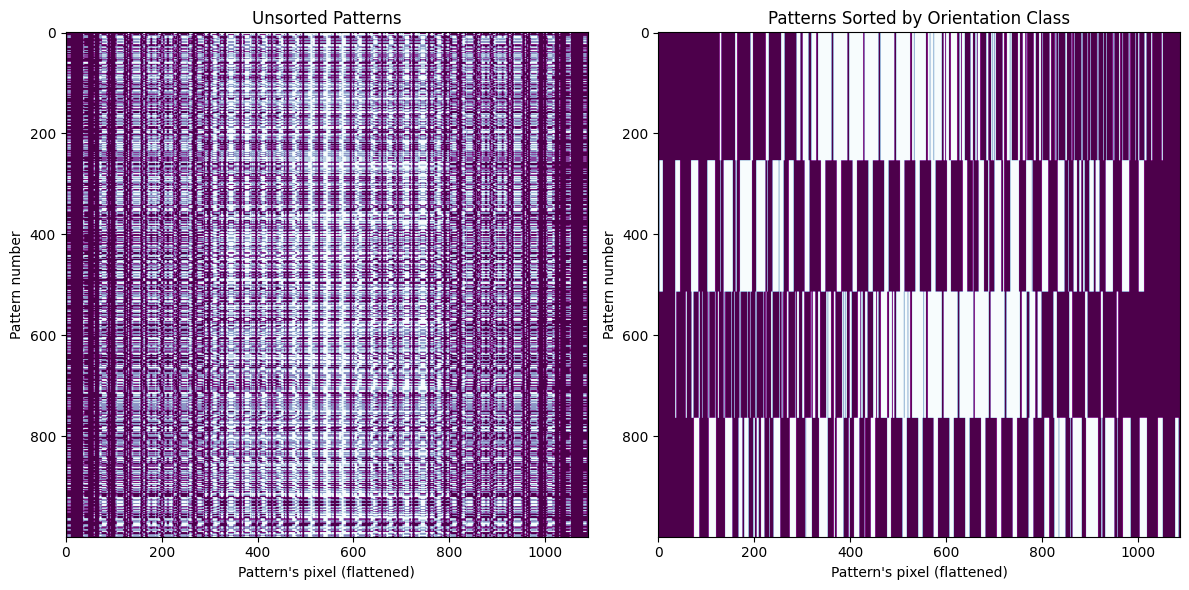

In [12]:


# Plot the unsorted design matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the unsorted design matrix
ax1.imshow(flat_patterns, cmap='BuPu', aspect='auto')
ax1.set_title("Unsorted Patterns")
ax1.set_xlabel("Pattern's pixel (flattened)")
ax1.set_ylabel("Pattern number")

# Plot the reordered sorted design matrix
ax2.imshow(sorted_patterns, cmap='BuPu', aspect='auto')
ax2.set_title("Patterns Sorted by Orientation Class")
ax2.set_xlabel("Pattern's pixel (flattened)")
ax2.set_ylabel("Pattern number")

plt.tight_layout()
plt.show()


# Finally checking the number of examples
We are doing this to ensure that the desired result is reached(checking the function from task 1 and 2 with clustering and reversed). To be sure from the accuracy of the result

In [13]:
cluster_counts = np.bincount(labels)
for cluster_num, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_num}: {count} elements")

Cluster 0: 254 elements
Cluster 1: 260 elements
Cluster 2: 250 elements
Cluster 3: 236 elements
